# Ma formation : Opencv 

## import package

In [1]:
from statistics import mode
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

'2.9.1'

In [2]:
mnist = tf.keras.datasets.mnist
num_classes = 10
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = tf.keras.utils.normalize(xTrain,axis=1)
xTest = tf.keras.utils.normalize(xTest,axis=1)
# Make sure images have shape (28, 28, 1)
xTrain = np.expand_dims(xTrain, -1)
xTest = np.expand_dims(xTest, -1)

# convert class vectors to binary class matrices
yTrain = keras.utils.to_categorical(yTrain, num_classes)
yTest = keras.utils.to_categorical(yTest, num_classes)

## Check image

c:\Users\hrevois\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


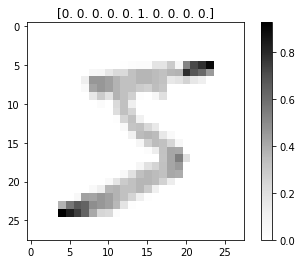

In [3]:
plt.imshow(xTrain[0],cmap='Greys')
plt.title(yTrain[0])
plt.colorbar()
plt.show()

## Build the model

In [4]:
input_shape = (28, 28, 1)




model = tf.keras.models.Sequential()

#Add layers
model.add(tf.keras.Input(shape = input_shape))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes,activation = "softmax"))


#Summary
model.summary()



#Compile with parameters (descent of gradiant etc...)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


#Test the model on the data
batch_size = 128
epochs = 15
model.fit(xTrain, yTrain, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [5]:
val_loss, val_acc = model.evaluate(xTest,yTest)
print(val_loss,val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9892
0.030638568103313446 0.9891999959945679


In [6]:
model.save("saved_model/MNIST")

INFO:tensorflow:Assets written to: saved_model/MNIST\assets


INFO:tensorflow:Assets written to: saved_model/MNIST\assets
